# Telco churn customer predictions

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Loading the data 
churn = pd.read_csv("data/churn.csv")

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# checking the rows and columns
churn.shape

(7043, 21)

In [5]:
# checking the columns in the data
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# checking the dtypes of columns
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# taking the statistics of the numerical columns
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: xlabel='Churn'>

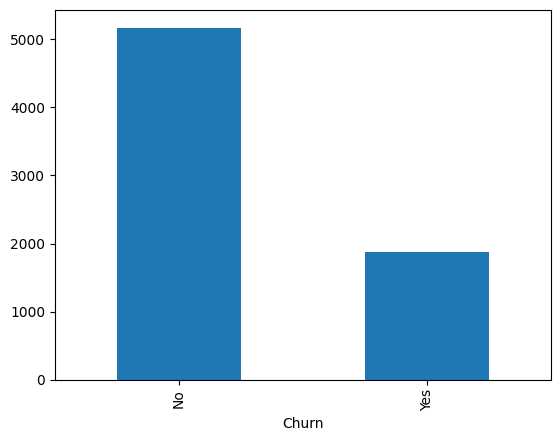

In [8]:
# Taking the total count of churners
churn['Churn'].value_counts().plot(kind= 'bar')

In [9]:
churn['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
# checking the ratio of churners
churn['Churn'].value_counts()/len(churn['Churn'])*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [11]:
# the data is imbalance that can be cause the overfitting in the machine learning model
# there are two techniques that can be used to balance the data
# upsampling
# down sampling

In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# How to deal with the missing value 
# There are mainly two ways to deal with the missing values while processing the data
# 1. fill the null rows with mean or 0 
# 2. drop the null values 


In [14]:
# Converting the data type of total charges from object to float
copied_churn = churn.copy()

In [15]:
copied_churn.TotalCharges = pd.to_numeric(copied_churn.TotalCharges , errors = 'coerce')

In [16]:
copied_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
# finding missing values 
copied_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
# Total Charges has null values
# droping the null values
copied_churn.dropna(how = 'any' , inplace = True)

In [19]:
# converting tenure into the tenure_group to making the easy analysis
labels = ["{0} - {1}".format(i,1+11) for i in range(1 , 72 , 12)]
copied_churn['tenure_group'] = pd.cut(copied_churn.tenure , range(1 , 80 , 12) , right = False , labels = labels)

In [20]:
copied_churn['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 12    1407
13 - 12    1024
25 - 12     832
49 - 12     832
37 - 12     762
Name: count, dtype: int64

In [21]:
# Droping the unneccessary colunns 
copied_churn.drop(columns = ['tenure' , 'customerID'] , axis = 1 , inplace = True)

In [22]:
copied_churn.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 12
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [23]:
copied_churn.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
tenure_group        category
dtype: object

# Data EXploration

In [24]:
# Visualization 
# Univaribale
# bivariable
# multivariable

In [25]:
# for i, predictor in enumerate(copied_churn.drop(columns = ['Churn' , 'MonthlyCharges','TotalCharges'])):
#     plt.figure(i)
#     sns.countplot(data = copied_churn , x = predictor , hue = 'Churn')

In [26]:
# converting target variable in numeric form
copied_churn['Churn'] = np.where(copied_churn.Churn == 'Yes',1,0)

In [27]:
copied_churn["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [28]:
# Converting all the catogorical columns into the numerical form
churn_dummies = pd.get_dummies(copied_churn)
churn_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 12,tenure_group_25 - 12,tenure_group_37 - 12,tenure_group_49 - 12,tenure_group_61 - 12
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [29]:
# finalizing the processed data
churn_dummies.to_csv("processed_churn.csv")

# Model Implementation

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [31]:
data = pd.read_csv('processed_churn.csv')

In [32]:
data.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 12,tenure_group_25 - 12,tenure_group_37 - 12,tenure_group_49 - 12,tenure_group_61 - 12
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


In [33]:
data.drop(columns = ['Unnamed: 0'] , axis = 1 , inplace = True)

In [34]:
data.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 12,tenure_group_25 - 12,tenure_group_37 - 12,tenure_group_49 - 12,tenure_group_61 - 12
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [35]:
x = data.drop(columns = ["Churn"])
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 12,tenure_group_25 - 12,tenure_group_37 - 12,tenure_group_49 - 12,tenure_group_61 - 12
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False


In [36]:
y = data["Churn"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [37]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [38]:
x_train.shape

(5625, 50)

In [39]:
x_test.shape

(1407, 50)

In [40]:
y_train.shape


(5625,)

In [41]:
y_test.shape

(1407,)

In [42]:
model_tree =DecisionTreeClassifier(criterion = 'entropy' , random_state = 42)

In [43]:
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [44]:
y_pred = model_tree.predict(x_test)

In [45]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
y_test

2476    0
6773    0
6116    1
3047    0
4092    0
       ..
1728    0
5241    0
5456    0
5842    0
3977    0
Name: Churn, Length: 1407, dtype: int64

In [47]:
print(classification_report(y_test , y_pred , labels = [0,1]))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1033
           1       0.46      0.49      0.48       374

    accuracy                           0.71      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.71      0.72      1407



In [48]:
import pickle
filename = 'churn_model.sav'
pickle.dump(model_tree , open(filename , 'wb'))

# CLustering model implementation

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data.drop(columns = ['Churn'] , axis = 1 , inplace = True)

In [50]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

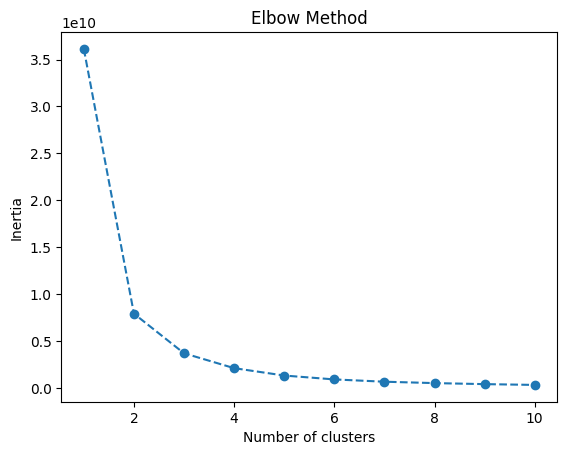

In [51]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)  
    inertia.append(kmeans.inertia_) 

# Plot the inertia values to visualize the "elbow"
# plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [52]:
# Run KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [53]:
cluster_labels = kmeans.labels_
data['Cluster'] = cluster_labels

In [54]:
data.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 12,tenure_group_25 - 12,tenure_group_37 - 12,tenure_group_49 - 12,tenure_group_61 - 12,Cluster
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,True,False,True,False,False,False,False,False,1
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,True,False,False,True,False,False,False,1
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,True,True,False,False,False,False,False,1
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,False,False,False,False,False,False,True,False,False,1
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,True,False,True,False,False,False,False,False,1


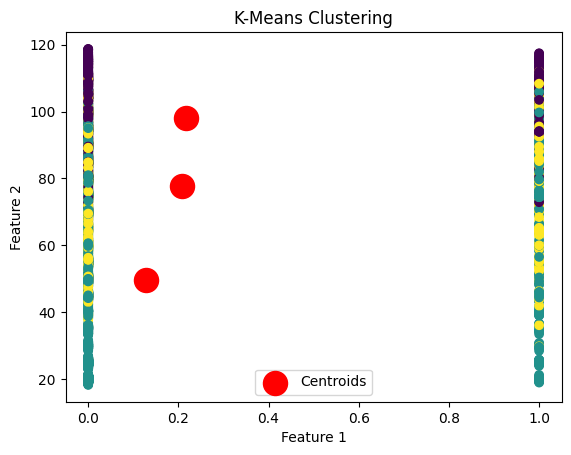

In [55]:
# Plot the data points with the assigned cluster labels
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



In [56]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.16733068e-01  9.79792430e+01  6.29777869e+03  5.00398406e-01
   4.99601594e-01  2.59760956e-01  7.40239044e-01  6.63745020e-01
   3.36254980e-01  1.59362550e-03  9.98406375e-01  1.68924303e-01
   1.59362550e-03  8.29482072e-01  2.29482072e-01  7.70517928e-01
  -9.15933995e-16  4.23904382e-01 -9.15933995e-16  5.76095618e-01
   2.49402390e-01 -9.15933995e-16  7.50597610e-01  2.50996016e-01
  -9.15933995e-16  7.49003984e-01  4.01593625e-01 -9.15933995e-16
   5.98406375e-01  1.92828685e-01 -9.15933995e-16  8.07171315e-01
   1.82470120e-01 -9.15933995e-16  8.17529880e-01  1.81673307e-01
   3.01195219e-01  5.17131474e-01  2.89243028e-01  7.10756972e-01
   3.27490040e-01  3.32270916e-01  2.88446215e-01  5.17928287e-02
  -2.27595720e-15 -1.94289029e-15  1.66533454e-16  3.18725100e-02
   2.50199203e-01  7.17928287e-01]
 [ 1.28660586e-01  4.97673308e+01  6.88070319e+02  4.98799808e-01
   5.01200192e-01  6.23859818e-01  3.76140182e-01  7.14834373e-01
   2.85165627e-01  1.08737398e-01  8.9126

In [57]:
from sklearn.metrics import silhouette_score
# Calculate Silhouette Score
sil_score = silhouette_score(data, cluster_labels)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.6447817185962685


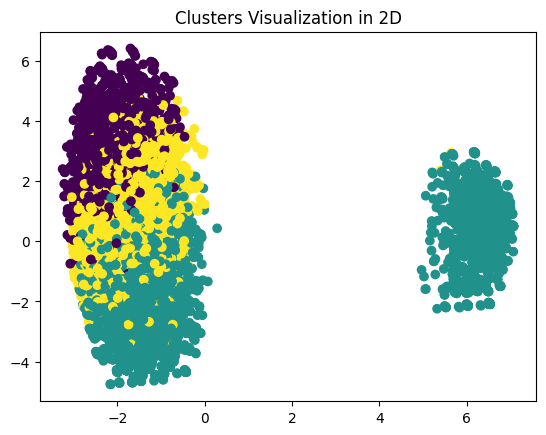

In [58]:
from sklearn.decomposition import PCA
# Apply PCA to reduce dimensions for visualization (if necessary)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)
# Plot clusters in 2D space
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clusters Visualization in 2D')
plt.show()


In [59]:
data

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 12,tenure_group_25 - 12,tenure_group_37 - 12,tenure_group_49 - 12,tenure_group_61 - 12,Cluster
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,True,False,True,False,False,False,False,False,1
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,True,False,False,True,False,False,False,1
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,True,True,False,False,False,False,False,1
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,False,False,False,False,False,False,True,False,False,1
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,True,False,True,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,2
7028,0,103.20,7362.90,True,False,False,True,False,True,False,...,True,False,False,False,False,False,False,False,True,0
7029,0,29.60,346.45,True,False,False,True,False,True,True,...,False,True,False,True,False,False,False,False,False,1
7030,1,74.40,306.60,False,True,False,True,True,False,False,...,False,False,True,True,False,False,False,False,False,1


<Axes: xlabel='Cluster', ylabel='count'>

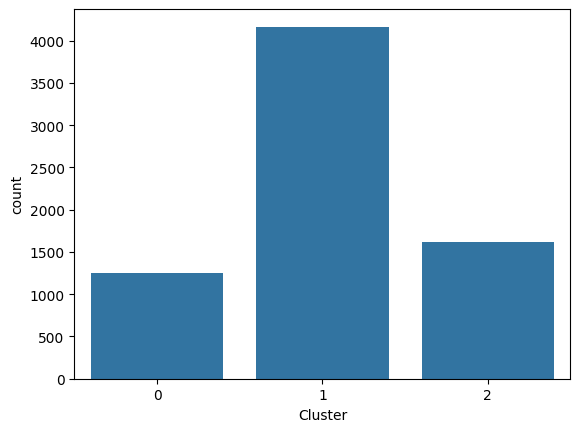

In [62]:
 sns.countplot(x = 'Cluster' , data = data )

In [67]:
# Saving the model 
with open('kmeans_model.pkl', 'wb') as file:  
    pickle.dump(kmeans, file)